<a href="https://colab.research.google.com/github/NJena404/Unicorn-company/blob/main/Unicorns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
df=pd.read_csv('/content/Unicorn_Companies.csv')

In [59]:
df.head(3)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1


In [60]:
df.shape

(1037, 13)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


In [78]:
#For any null value
df.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Inverstors    0
Founded Year         0
Total Raised         0
Financial Stage      0
Investors Count      0
Deal Terms           0
Portfolio Exits      0
dtype: int64

In [62]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,256,33,1006,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,205,17,144,24,988,69,280,988


In [89]:
#Converting Valuation
df["Valuation ($B)"] = df["Valuation ($B)"].replace({"\$": ""}, regex=True)
df["Valuation ($B)"] = df["Valuation ($B)"].astype(float)

In [90]:
fig = px.treemap(df,path= ["Country","Industry", "Company"],
            values="Valuation ($B)", color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

In [63]:
#Contry wise company counts
df['Country'].value_counts()

United States           536
China                   168
India                    63
United Kingdom           42
France                   24
Germany                  24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                12
Indonesia                 7
Sweden                    6
Netherlands               6
Mexico                    6
Australia                 6
Hong Kong                 6
Japan                     6
Ireland                   5
Switzerland               5
Norway                    4
Belgium                   3
Spain                     3
Finland                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Philippines               2
Chile                     2
Thailand                  2
Estonia                   2
Denmark                   2
Vietnam                   2
Austria                   2
Colombia                  2
Czech Republic      

In [64]:
#type of industry
df['Industry'].value_counts().head(10)

Fintech                                205
Internet software & services           192
E-commerce & direct-to-consumer        107
Artificial intelligence                 71
Health                                  69
Supply chain, logistics, & delivery     57
Other                                   56
Cybersecurity                           49
Data management & analytics             41
Mobile & telecommunications             37
Name: Industry, dtype: int64

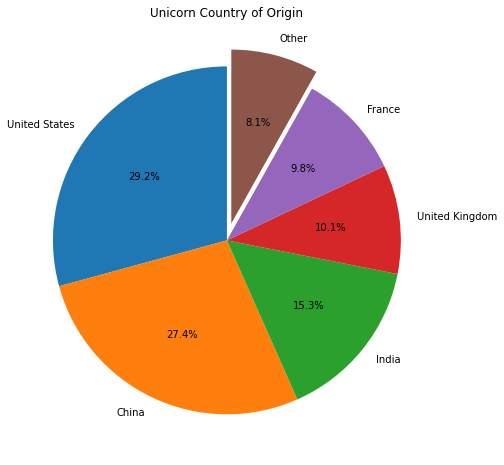

In [65]:
#Unicorns from different countries
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(df['Industry'].value_counts().head(6), explode=(0,0,0,0,0,0.1), labels=['United States', 'China', 'India', 'United Kingdom', 'France', 'Other'], 
        autopct='%1.1f%%', startangle=90)
ax1.set(title='Unicorn Country of Origin')
plt.show()

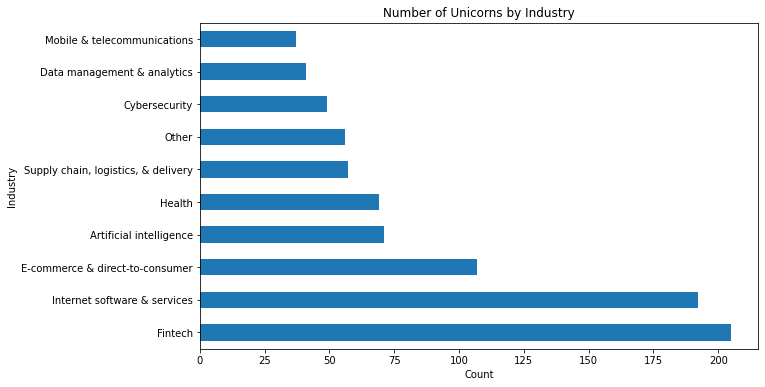

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
ax = df['Industry'].value_counts().head(10).plot(kind='barh')
ax.set(xlabel='Count', ylabel='Industry', title='Number of Unicorns by Industry')
plt.show()

In [95]:
# Financial Stage comparison wrt Valuation,
# Dropped "none" values here, so only companies with valid financial stage are shown.
Financial_St = df[df["Financial Stage"] != "None"]
Financial_St["Financial Stage"] = Financial_St['Financial Stage'].replace({"Acq": "Acquired"})
Financial_St = Financial_St.dropna()
fig = px.bar(data_frame=Financial_St, x="Financial Stage", y="Valuation ($B)", color="Country", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
#biggest companies
top_10_companies = df.sort_values("Valuation ($B)", ascending=False)[:10]
top_10_companies

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2
5,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2012,$571.26M,None,26,8,None
6,Checkout.com,40.0,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2012,$1.83B,None,15,4,None
7,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2012,$2.686B,None,29,12,None
8,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2013,$3.497B,None,29,8,None
9,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2015,$1.716B,None,31,6,None
